In [2]:
# Setup environment detection and configuration

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Detect if running in Kaggle
def is_kaggle():
    return os.path.exists('/kaggle/input')

# Get the correct path to project root
def get_project_root():
    if is_kaggle():
        return '/kaggle'
    else:
        # If a notebook is in notebooks/ folder, go up one level for project root
        current_dir = os.getcwd()
        if os.path.basename(current_dir) == 'notebooks':
            return os.path.dirname(current_dir)  # Go up one level
        return current_dir  # Already at root level

# Set up environment-specific paths
project_root = get_project_root()

if is_kaggle():
    # Kaggle paths
    input_dir = '/kaggle/input'
    working_dir = '/kaggle/working'
    vis_dir = '/kaggle/working/visualizations'
else:
    # Local paths relative to project root
    input_dir = os.path.join(project_root, 'data', 'input')
    working_dir = os.path.join(project_root, 'data', 'working')
    vis_dir = os.path.join(project_root, 'data', 'visualizations')

# Create directories if they don't exist
for dir_path in [input_dir, working_dir, vis_dir]:
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
        print(f"Created directory: {dir_path}")

# Display environment info
print(f"Running in {'Kaggle' if is_kaggle() else 'Local Jupyter'} environment")
print(f"Project root: {project_root}")
print(f"Input directory: {input_dir}")
print(f"Working directory: {working_dir}")
print(f"Visualization directory: {vis_dir}")

# Set visualization style
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("Setup complete. Ready to begin COVID-19 data analysis.")

Running in Local Jupyter environment
Project root: C:\Users\nelso\OneDrive\Desktop\covid19-global-tracker
Input directory: C:\Users\nelso\OneDrive\Desktop\covid19-global-tracker\data\input
Working directory: C:\Users\nelso\OneDrive\Desktop\covid19-global-tracker\data\working
Visualization directory: C:\Users\nelso\OneDrive\Desktop\covid19-global-tracker\data\visualizations
Setup complete. Ready to begin COVID-19 data analysis.


In [3]:
# Data Collection
# Download data from Our World in Data COVID-19 dataset

# Define file paths based on environment
owid_csv_name = 'owid-covid-data.csv'
output_file = os.path.join(working_dir, owid_csv_name)

# Possible Kaggle dataset paths (check common Kaggle COVID dataset names)
kaggle_possible_paths = [
    os.path.join(input_dir, 'covid19', owid_csv_name),
    os.path.join(input_dir, 'covid-19-data', owid_csv_name),
    os.path.join(input_dir, 'owid-covid-data', owid_csv_name),
    os.path.join(input_dir, 'owid-covid19-data', owid_csv_name),
    os.path.join(input_dir, 'covid19dataset', owid_csv_name),
    # Add more potential paths if needed
]

try:
    # First check if dataset exists in any Kaggle input path
    found_in_kaggle = False
    if is_kaggle():
        for path in kaggle_possible_paths:
            if os.path.exists(path):
                print(f"Found COVID-19 data at: {path}")
                df = pd.read_csv(path)
                found_in_kaggle = True
                break

    # If not found in Kaggle or not in Kaggle, try direct download
    if not found_in_kaggle:
        print("Downloading COVID-19 data from Our World in Data GitHub...")
        url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
        df = pd.read_csv(url)

        # Save a local copy
        df.to_csv(output_file, index=False)
        print(f"Data downloaded and saved to {output_file}")

    print(f"Data loaded successfully. Shape: {df.shape}")
    print(f"Date range: {df['date'].min()} to {df['date'].max()}")

except Exception as e:
    print(f"Error loading data: {e}")
    print("\nTo add this dataset to your Kaggle notebook:")
    print("1. Click 'Add data' at the top right of the notebook")
    print("2. Search for 'covid-19 dataset' or 'our world in data covid'")
    print("3. Add the dataset and run this cell again")
    print("\nOr you can manually download from:")
    print("https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv")

Data downloaded and saved to C:\Users\nelso\OneDrive\Desktop\covid19-global-tracker\data\working\owid-covid-data.csv
Data loaded successfully. Shape: (429435, 67)
Date range: 2020-01-01 to 2024-08-14


In [4]:
# Data Exploration
# Examine the structure and content of the dataset

# Check the first few rows
print("Preview of the dataset:")
display(df.head())

# Check basic information
print("\nDataset Information:")
df.info()

# Check summary statistics
print("\nSummary Statistics:")
display(df.describe())

# Examine columns
print("\nColumns in the dataset:")
for col in df.columns:
    print(f"- {col}")

# Check for missing values
print("\nMissing values by column:")
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df) * 100).round(2)
missing_data = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percent})
display(missing_data[missing_data['Missing Values'] > 0])

Preview of the dataset:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,54.42,18.60,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.50,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,54.42,18.60,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.50,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,54.42,18.60,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.50,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,54.42,18.60,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.50,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,54.42,18.60,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.50,64.83,0.51,41128772,NaN,NaN,NaN,NaN



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         4093

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,411804.00,410159.00,408929.00,411804.00,410608.00,409378.00,411804.00,410159.00,408929.00,411804.00,410608.00,409378.00,184817.00,39116.00,39116.00,40656.00,40656.00,10993.00,10993.00,24497.00,24497.00,79387.00,75403.00,79387.00,75403.00,103965.00,103965.00,95927.00,94348.00,85417.00,81132.00,78061.00,53600.00,70971.00,195029.00,85417.00,81132.00,78061.00,53600.00,195029.00,192177.00,192177.00,196190.00,360492.00,334663.00,323270.00,331315.00,328292.00,211996.00,328865.00,345911.00,247165.00,243817.00,161741.00,290689.00,390299.00,319127.00,429435.00,13411.00,13411.00,13411.00,13411.00
mean,7365292.35,8017.36,8041.03,81259.57,71.85,72.06,112096.20,122.36,122.71,835.51,0.76,0.76,0.91,660.97,15.66,3911.74,125.99,317.89,9.67,4291.72,82.62,21104573.94,67285.41,924.25,3.27,142178.36,2.83,0.10,2403.63,561697983.43,248706410.74,228663910.07,150581058.90,739864.03,283875.82,124.28,53.50,48.68,36.30,1851.48,106070.70,0.07,42.88,394.07,30.46,8.68,5.49,18904.18,13.92,264.64,8.56,10.77,33.10,50.65,3.11,73.70,0.72,152033640.40,56047.65,9.77,10.93,1772.67
std,44775816.77,229664.87,86616.11,441190.14,1368.32,513.64,162240.41,1508.78,559.70,1134.93,6.98,2.55,0.40,2139.62,22.79,9845.75,151.16,514.41,13.57,10919.62,88.40,84098694.31,247734.00,2195.43,9.03,1138214.66,7.31,0.12,33443.66,1842160151.90,800646051.13,740376339.04,436069655.27,3183064.38,1922351.90,85.10,29.38,29.04,30.22,3117.83,786688.39,0.18,24.87,1785.45,9.09,6.09,4.14,19829.58,20.07,120.76,4.93,10.76,13.85,31.91,2.55,7.39,0.15,697540771.67,156869.08,12.04,24.56,1991.89
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,15.10,1.14,0.53,661.24,0.10,79.37,0.99,0.10,7.70,1.19,0.10,53.28,0.39,47.00,-37726.10,-44.23,-95.92,-2936.45
25%,6280.75,0.00,0.00,43.00,0.00,0.00,1916.10,0.00,0.00,24.57,0.00,0.00,0.72,21.00,2.33,186.00,31.00,17.00,1.55,223.00,23.73,364654.00,2244.00,43.59,0.29,1486.00,0.20,0.02,7.10,1970788.00,1050009.25,964400.00,602282.00,2010.00,279.00,44.77,27.88,21.22,5.92,106.00,43.00,0.00,22.22,37.73,22.20,3.53,2.06,4227.63,0.60,175.70,5.35,1.90,22.60,20.86,1.30,69.50,0.60,523798.00,176.50,2.06,-1.50,116.88
50%,63653.00,0.00,12.00,799.00,0.00,0.00,29145.48,0.00,2.79,295.09,0.00,0.00,0.95,90.00,6.43,776.00,74.23,92.00,4.64,864.00,56.28,2067330.00,8783.00,234.14,0.97,6570.00,0.85,0.06,17.50,14394348.00,6901087.50,6191345.00,5765440.00,20531.00,3871.00,130.55,64.30,57.92,35.91,605.00,771.00,0.01,42.85,88.12,29.70,6.29,3.87,12294.88,2.50,245.46,7.20,6.30,33.10,49.54,2.5


Columns in the dataset:
- iso_code
- continent
- location
- date
- total_cases
- new_cases
- new_cases_smoothed
- total_deaths
- new_deaths
- new_deaths_smoothed
- total_cases_per_million
- new_cases_per_million
- new_cases_smoothed_per_million
- total_deaths_per_million
- new_deaths_per_million
- new_deaths_smoothed_per_million
- reproduction_rate
- icu_patients
- icu_patients_per_million
- hosp_patients
- hosp_patients_per_million
- weekly_icu_admissions
- weekly_icu_admissions_per_million
- weekly_hosp_admissions
- weekly_hosp_admissions_per_million
- total_tests
- new_tests
- total_tests_per_thousand
- new_tests_per_thousand
- new_tests_smoothed
- new_tests_smoothed_per_thousand
- positive_rate
- tests_per_case
- tests_units
- total_vaccinations
- people_vaccinated
- people_fully_vaccinated
- total_boosters
- new_vaccinations
- new_vaccinations_smoothed
- total_vaccinations_per_hundred
- people_vaccinated_per_hundred
- people_fully_vaccinated_per_hundred
- total_boosters_per_hundr

,Missing Values,Percentage
weekly_icu_admissions,418442,97.44
weekly_icu_admissions_per_million,418442,97.44
excess_mortality,416024,96.88
excess_mortality_cumulative_absolute,416024,96.88
excess_mortality_cumulative,416024,96.88
excess_mortality_cumulative_per_million,416024,96.88
weekly_hosp_admissions,404938,94.30
weekly_hosp_admissions_per_million,404938,94.30
icu_patients_per_million,390319,90.89
icu_patients,390319,90.89


In [10]:
# Explore country-level information

# Count unique countries and continents
print(f"Number of unique locations: {df['location'].nunique()}")
print(f"Number of unique countries: {df[df['iso_code'].str.startswith('OWID_') == False]['location'].nunique()}")
print(f"Number of continents/regions: {df[df['iso_code'].str.startswith('OWID_')]['location'].nunique()}")

# List all continents
continents = df[df['continent'].notnull()]['continent'].unique()
print(f"\nContinents: {', '.join(continents)}")

# Get the latest date in the dataset
latest_date = df['date'].max()
print(f"\nLatest data date: {latest_date}")

# Countries with the highest case counts (the latest date)
print("\nTop 10 countries by total cases (latest available data):")
top_cases = df[df['date'] == latest_date].sort_values('total_cases', ascending=False)
top_countries = top_cases[~top_cases['iso_code'].str.startswith('OWID_', na=True)]  # Filter out aggregates
display(top_countries[['location', 'total_cases', 'total_deaths', 'total_cases_per_million', 'total_deaths_per_million']].head(10))

Number of unique locations: 255
Number of unique countries: 237
Number of continents/regions: 18

Continents: Asia, Europe, Africa, Oceania, North America, South America

Latest data date: 2024-08-14

Top 10 countries by total cases (latest available data):


,location,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million
217093,Lithuania,NaN,NaN,NaN,NaN
230301,Malaysia,NaN,NaN,NaN,NaN


In [15]:
# Data Cleaning and Preparation

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])
print("Converted date column to datetime format")

# Create a list of focus countries for detailed analysis
focus_countries = ['Kenya', 'United States', 'India', 'United Kingdom', 'Brazil',
                   'South Africa', 'China', 'Germany', 'Australia', 'Russia']

# Create a filtered dataset for focus countries
df_focus = df[df['location'].isin(focus_countries)].copy()
print(f"Created filtered dataset with {len(focus_countries)} focus countries")

# Check the date range for each focus country
date_ranges = df_focus.groupby('location').agg({'date': ['min', 'max']})
print("\nDate ranges for focus countries:")
display(date_ranges)

# Handle missing values for key metrics
key_metrics = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
               'total_cases_per_million', 'total_deaths_per_million',
               'people_vaccinated', 'people_fully_vaccinated']

# Forward fill missing values within each country (carries forward the last known value)
for country in focus_countries:
    country_data = df_focus[df_focus['location'] == country].copy()
    for metric in key_metrics:
        if metric in country_data.columns:
            # Forward fill within reasonable limits
            df_focus.loc[df_focus['location'] == country, metric] = country_data[metric].ffill()

print("\nHandled missing values for key metrics using forward fill method")

# Calculate derived metrics
df_focus['case_fatality_rate'] = (df_focus['total_deaths'] / df_focus['total_cases'] * 100).round(2)
print("Created case fatality rate metric")

# Create vaccination percentage where data is available
if 'people_vaccinated' in df_focus.columns and 'population' in df_focus.columns:
    df_focus['vaccination_percentage'] = (df_focus['people_vaccinated'] / df_focus['population'] * 100).round(2)
    df_focus['fully_vaccinated_percentage'] = (df_focus['people_fully_vaccinated'] / df_focus['population'] * 100).round(2)
    print("Created vaccination percentage metrics")

# Summary of cleaned data
print("\nSummary of cleaned data for focus countries:")
print(f"Shape: {df_focus.shape}")
print(f"Date range: {df_focus['date'].min()} to {df_focus['date'].max()}")
print(f"Missing values remaining in key metrics:")
display(df_focus[key_metrics].isnull().sum())

# Save the cleaned data
cleaned_file = os.path.join(working_dir, 'cleaned_covid_data.csv')
df_focus.to_csv(cleaned_file, index=False)
print(f"Saved cleaned data to {cleaned_file}")

Converted date column to datetime format
Created filtered dataset with 10 focus countries

Date ranges for focus countries:


date           
                      min        max
location                            
Australia      2020-01-05 2024-08-04
Brazil         2020-01-05 2024-08-04
China          2020-01-05 2024-08-04
Germany        2020-01-05 2024-08-04
India          2020-01-05 2024-08-12
Kenya          2020-01-05 2024-08-04
Russia         2020-01-05 2024-08-04
South Africa   2020-01-05 2024-08-04
United Kingdom 2020-01-05 2024-08-04
United States  2020-01-05 2024-08-04


Handled missing values for key metrics using forward fill method
Created case fatality rate metric
Created vaccination percentage metrics

Summary of cleaned data for focus countries:
Shape: (16748, 70)
Date range: 2020-01-05 00:00:00 to 2024-08-12 00:00:00
Missing values remaining in key metrics:


total_cases                    0
new_cases                      0
total_deaths                   0
new_deaths                     0
total_cases_per_million        0
total_deaths_per_million       0
people_vaccinated           3937
people_fully_vaccinated     4236
dtype: int64

Saved cleaned data to C:\Users\nelso\OneDrive\Desktop\covid19-global-tracker\data\working\cleaned_covid_data.csv


<Figure size 1400x1000 with 0 Axes>

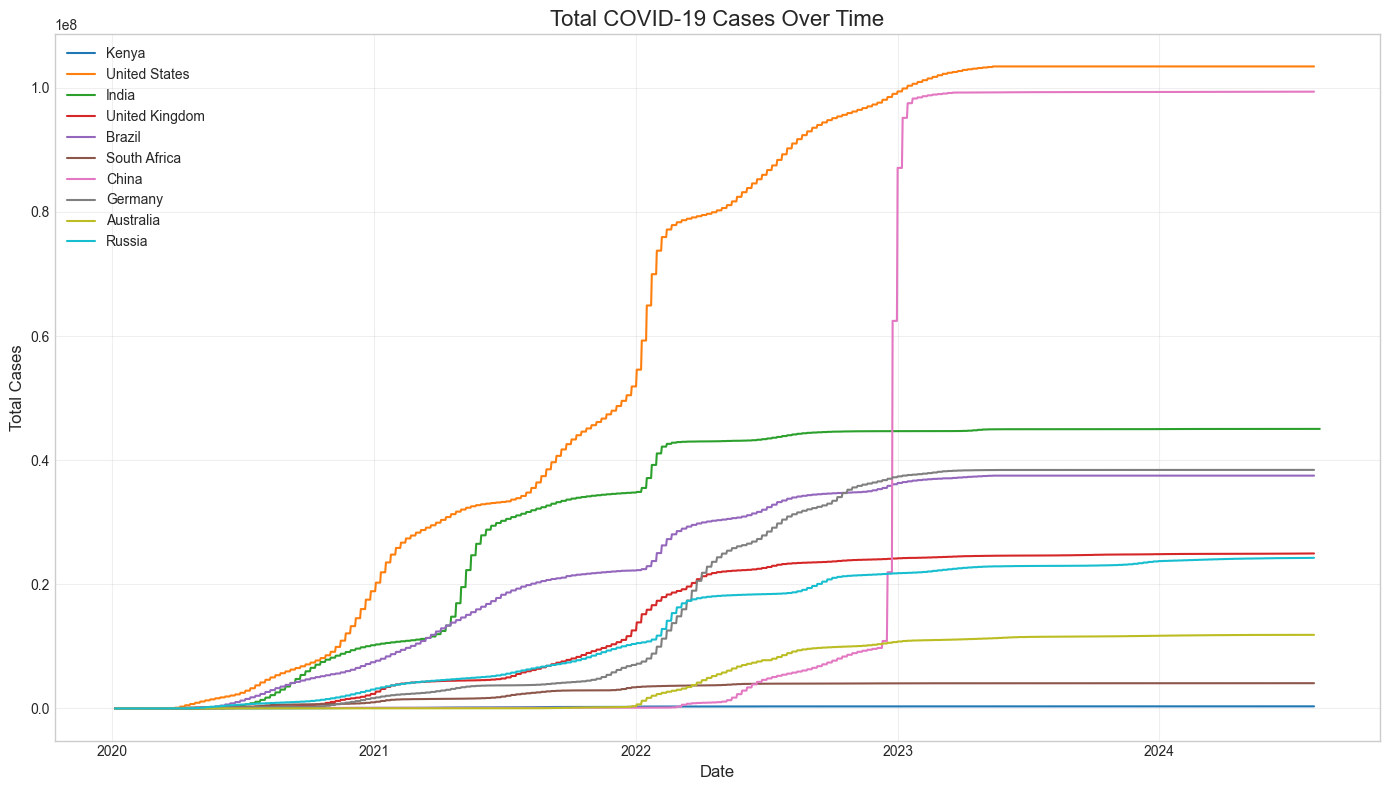

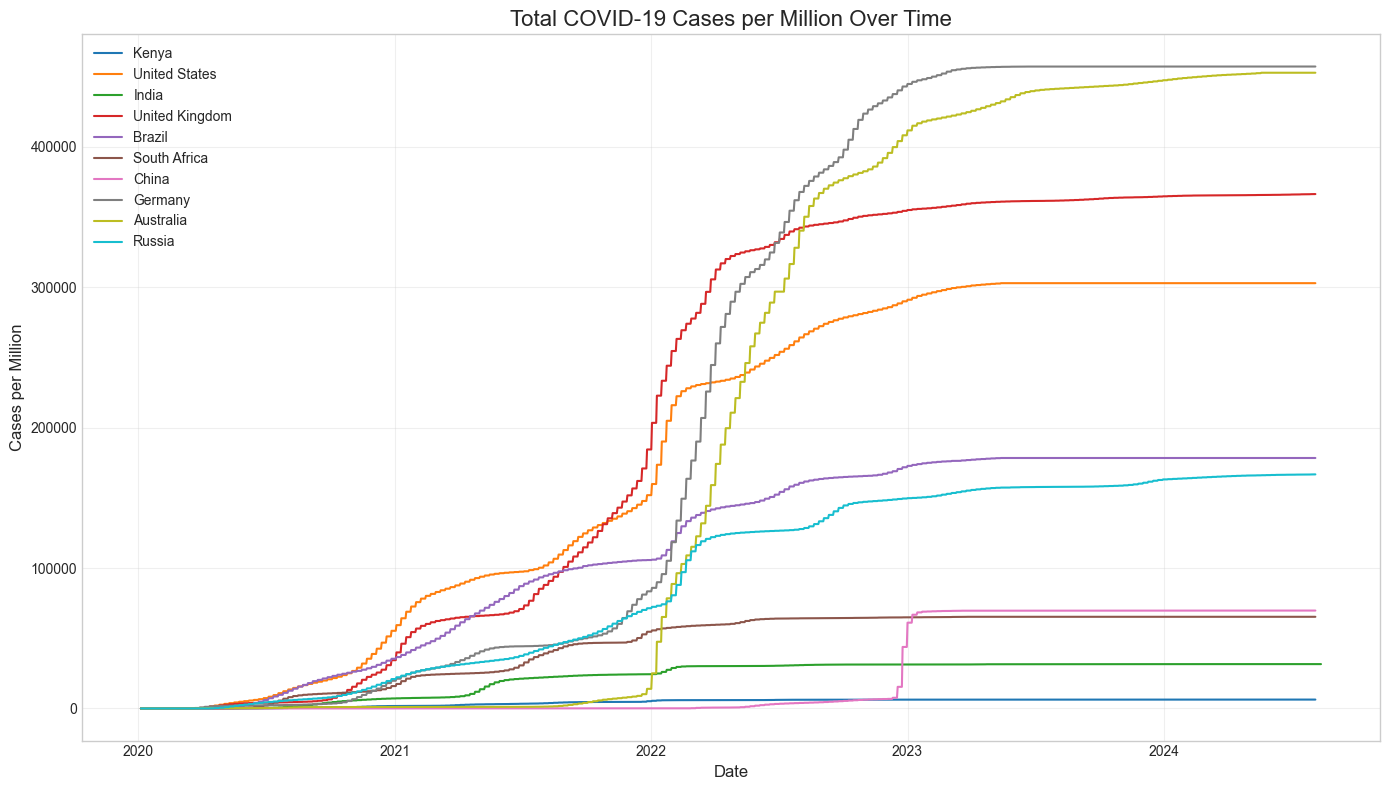

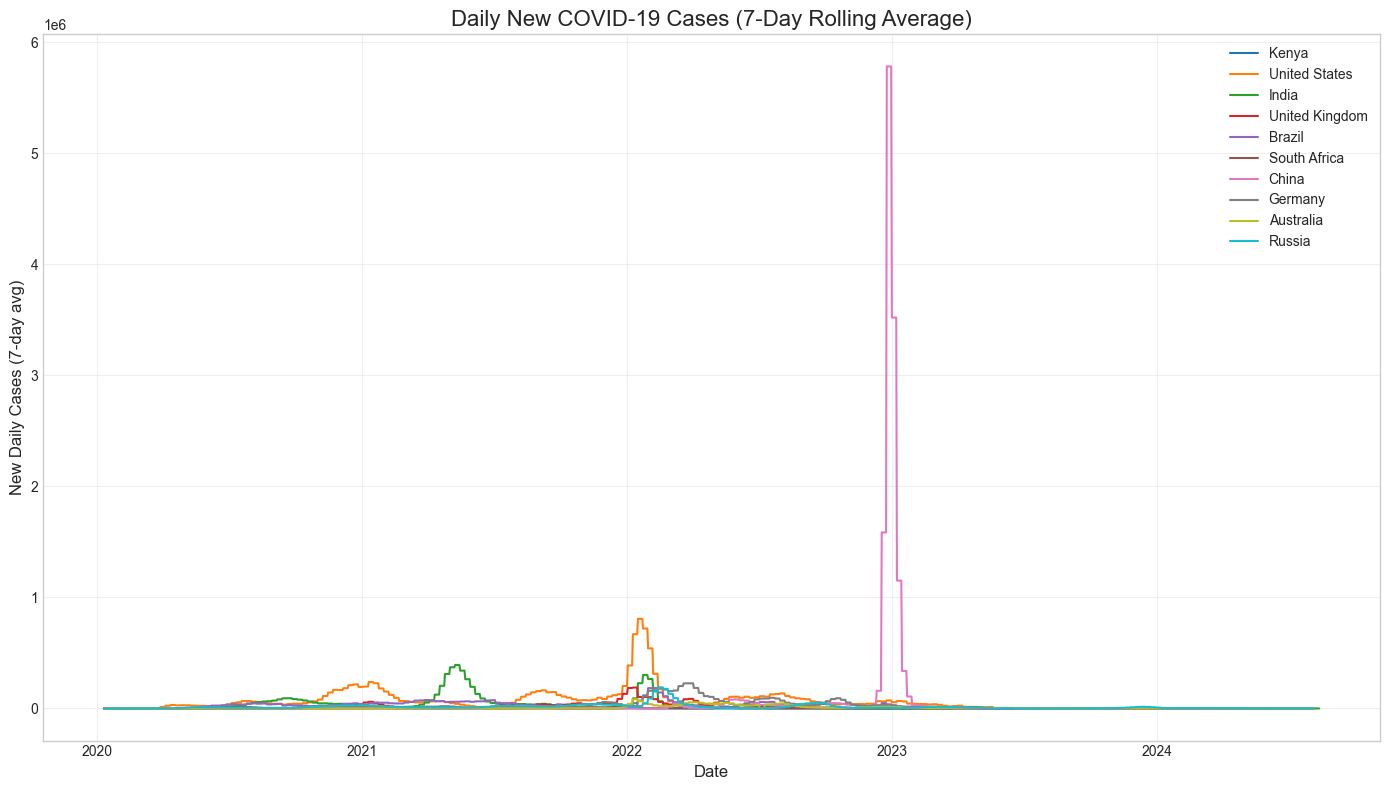

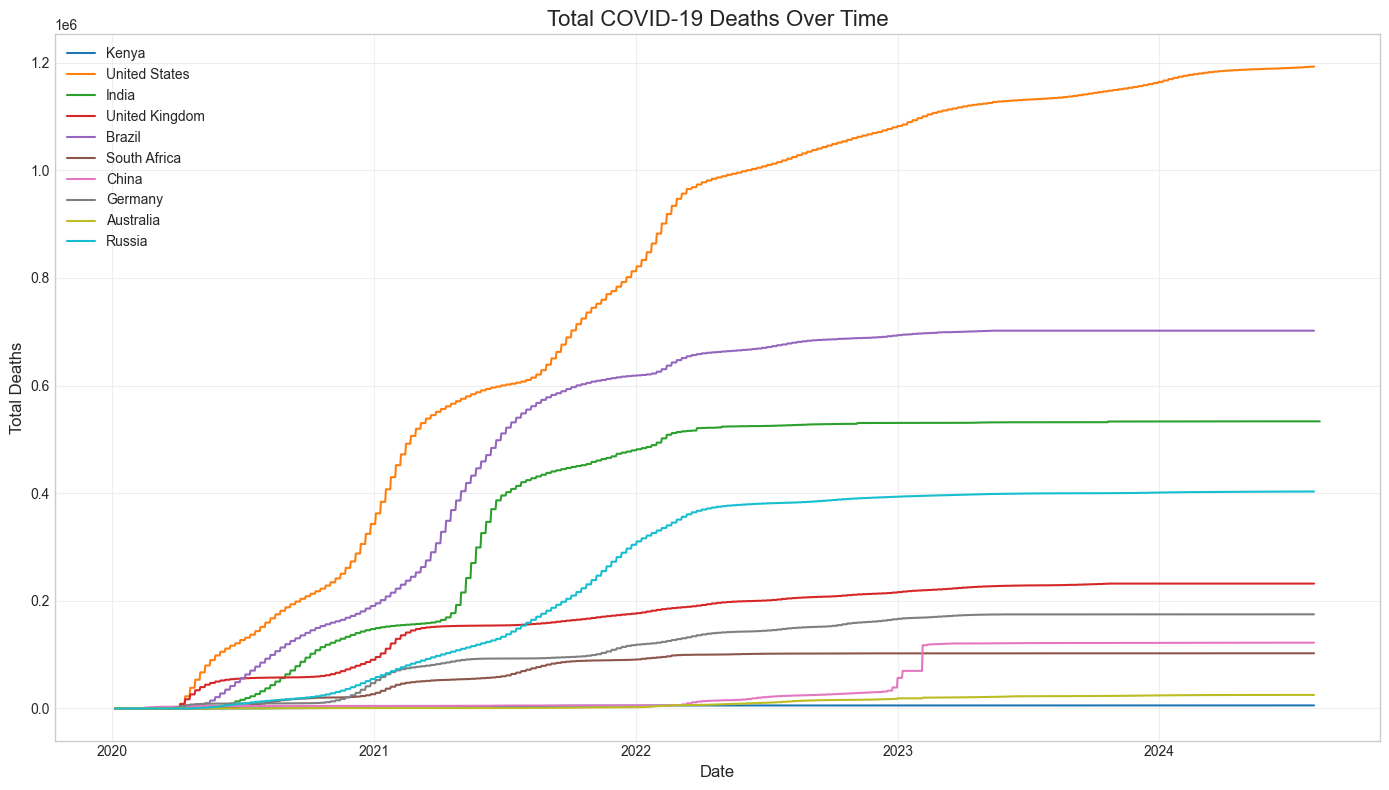

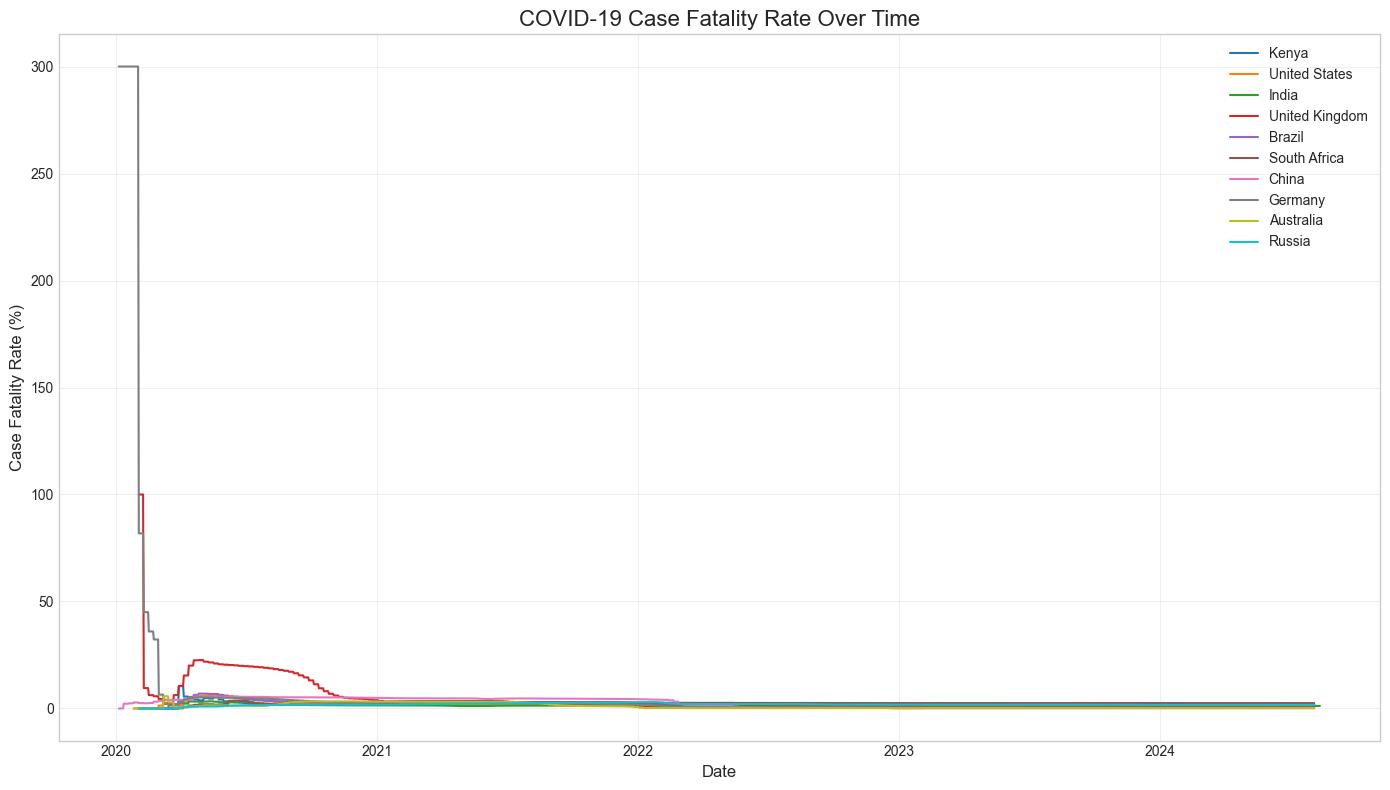

In [12]:
# Exploratory Data Analysis - Time Trends

# Set up figure aesthetics for time series plots
plt.figure(figsize=(14, 10))
plt.style.use('seaborn-v0_8-whitegrid')

# 1. Total cases over time for focus countries
plt.figure(figsize=(14, 8))
for country in focus_countries:
    country_data = df_focus[df_focus['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'total_cases_time_trend.png'), dpi=300)
plt.show()

# 2. Total cases per million (better for comparison)
plt.figure(figsize=(14, 8))
for country in focus_countries:
    country_data = df_focus[df_focus['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases_per_million'], label=country)

plt.title('Total COVID-19 Cases per Million Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cases per Million', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'cases_per_million_time_trend.png'), dpi=300)
plt.show()

# 3. Daily new cases (7-day rolling average for smoothing)
plt.figure(figsize=(14, 8))
for country in focus_countries:
    country_data = df_focus[df_focus['location'] == country]
    # Calculate 7-day rolling average if new_cases exists
    if 'new_cases' in country_data.columns:
        rolling = country_data['new_cases'].rolling(window=7).mean()
        plt.plot(country_data['date'], rolling, label=country)

plt.title('Daily New COVID-19 Cases (7-Day Rolling Average)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('New Daily Cases (7-day avg)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'new_cases_rolling_average.png'), dpi=300)
plt.show()

# 4. Total deaths over time
plt.figure(figsize=(14, 8))
for country in focus_countries:
    country_data = df_focus[df_focus['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'total_deaths_time_trend.png'), dpi=300)
plt.show()

# 5. Case fatality rate over time
plt.figure(figsize=(14, 8))
for country in focus_countries:
    country_data = df_focus[df_focus['location'] == country]
    plt.plot(country_data['date'], country_data['case_fatality_rate'], label=country)

plt.title('COVID-19 Case Fatality Rate Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Case Fatality Rate (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'case_fatality_rate.png'), dpi=300)
plt.show()

Latest date with complete data: 2024-08-12 00:00:00
Latest data shape: (1, 70)


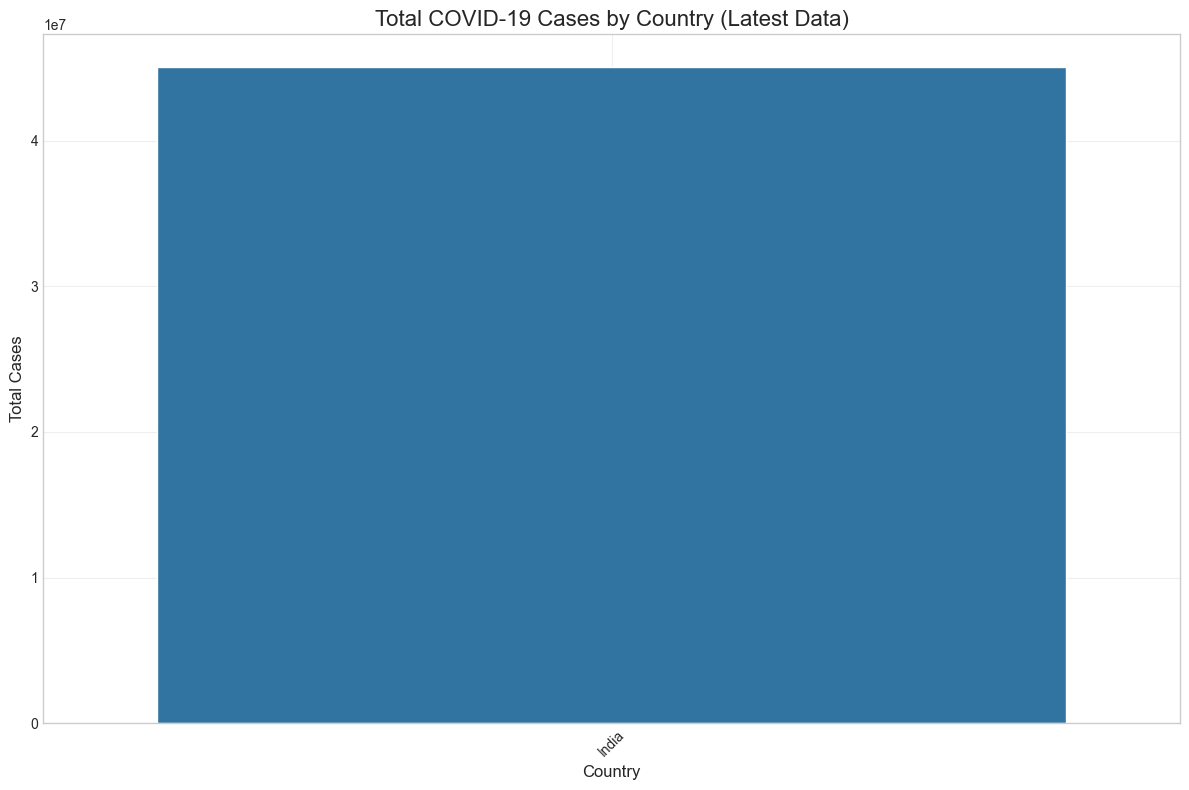

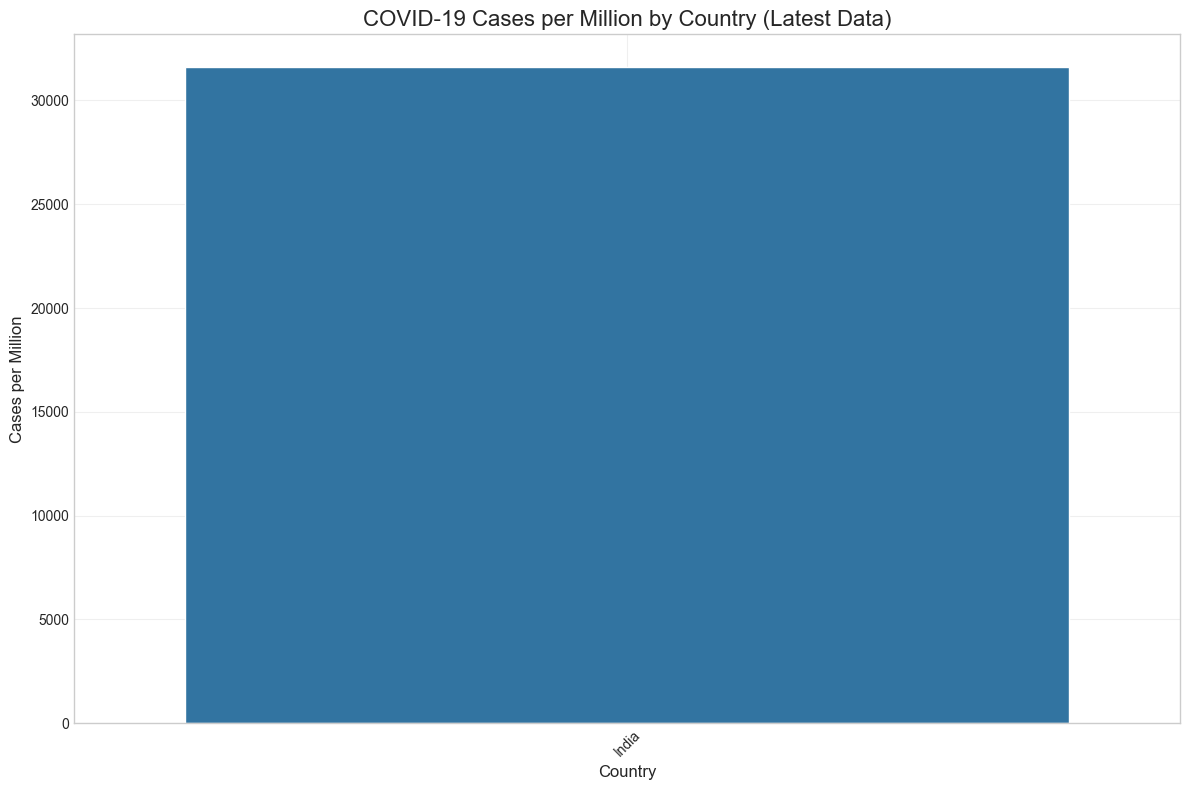

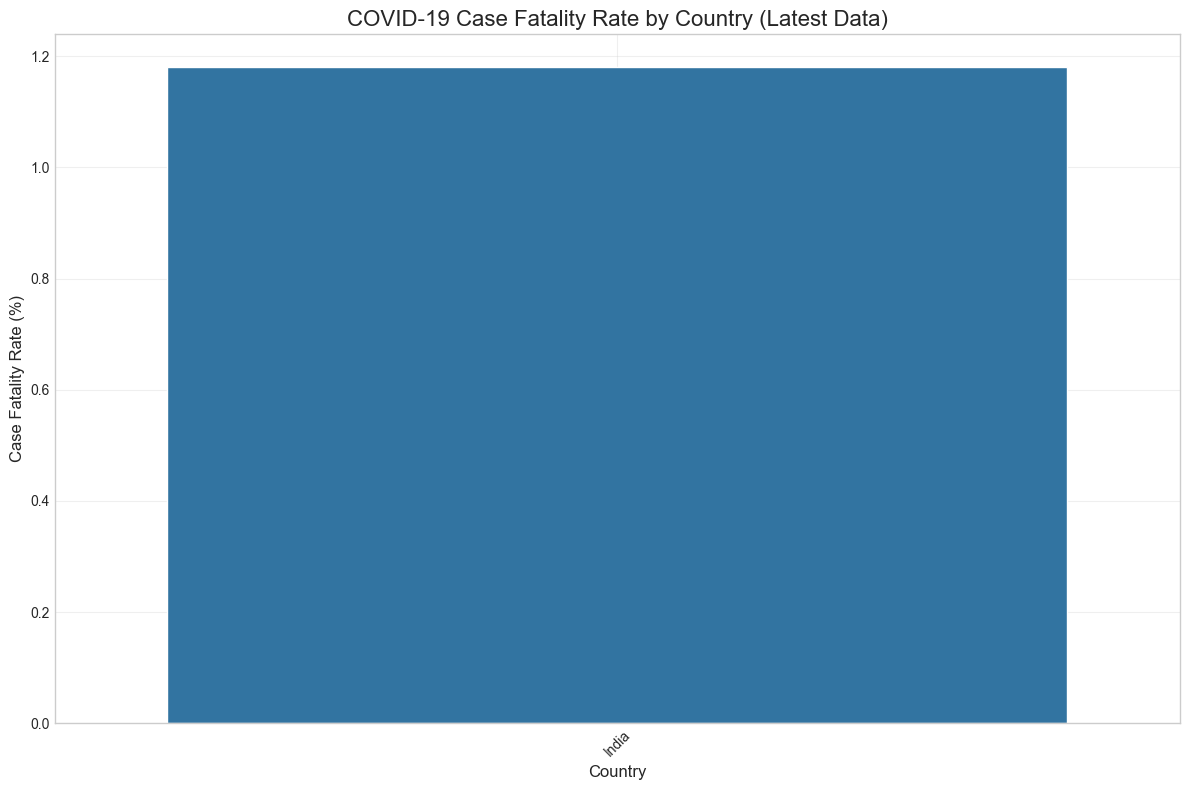

COVID-19 Metrics Comparison Across Countries (Latest Data):


,location,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,case_fatality_rate,vaccination_percentage,fully_vaccinated_percentage
175230,India,45041748.00,31598.86,533623.00,374.36,1.18,72.50,67.18


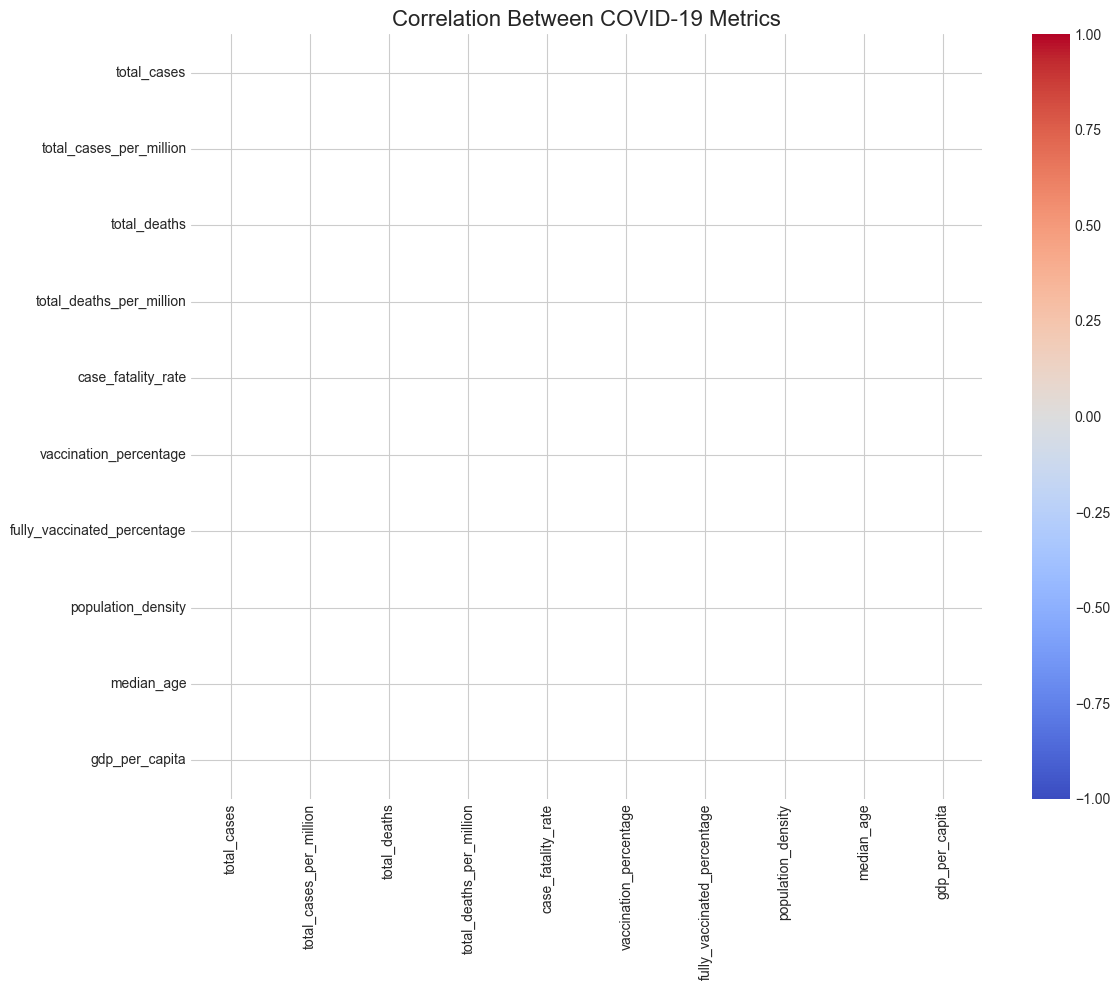

In [16]:
# Comparative Analysis Across Countries

# Get the latest date with good data coverage
latest_complete_date = df_focus['date'].max()
print(f"Latest date with complete data: {latest_complete_date}")

# Create a dataframe with the latest data for each country
latest_data = df_focus[df_focus['date'] == latest_complete_date].copy()
print(f"Latest data shape: {latest_data.shape}")

# 1. Bar chart of total cases (the latest date)
plt.figure(figsize=(12, 8))
chart_data = latest_data.sort_values('total_cases', ascending=False)
sns.barplot(x='location', y='total_cases', data=chart_data)
plt.title('Total COVID-19 Cases by Country (Latest Data)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'total_cases_by_country.png'), dpi=300)
plt.show()

# 2. Bar chart of total cases per million (better for comparison)
plt.figure(figsize=(12, 8))
chart_data = latest_data.sort_values('total_cases_per_million', ascending=False)
sns.barplot(x='location', y='total_cases_per_million', data=chart_data)
plt.title('COVID-19 Cases per Million by Country (Latest Data)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Cases per Million', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'cases_per_million_by_country.png'), dpi=300)
plt.show()

# 3. Bar chart of case fatality rate
plt.figure(figsize=(12, 8))
chart_data = latest_data.sort_values('case_fatality_rate', ascending=False)
sns.barplot(x='location', y='case_fatality_rate', data=chart_data)
plt.title('COVID-19 Case Fatality Rate by Country (Latest Data)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Case Fatality Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'fatality_rate_by_country.png'), dpi=300)
plt.show()

# 4. Create a combined metrics comparison table
comparison_metrics = ['total_cases', 'total_cases_per_million',
                      'total_deaths', 'total_deaths_per_million',
                      'case_fatality_rate']

# Add vaccination metrics if available
if 'vaccination_percentage' in latest_data.columns:
    comparison_metrics.extend(['vaccination_percentage', 'fully_vaccinated_percentage'])

comparison_table = latest_data[['location'] + comparison_metrics].sort_values('total_cases_per_million', ascending=False)

# Display formatted table
print("COVID-19 Metrics Comparison Across Countries (Latest Data):")
display(comparison_table)

# 5. Correlation analysis between different metrics
correlation_metrics = comparison_metrics.copy()
if 'population_density' in latest_data.columns:
    correlation_metrics.append('population_density')
if 'median_age' in latest_data.columns:
    correlation_metrics.append('median_age')
if 'gdp_per_capita' in latest_data.columns:
    correlation_metrics.append('gdp_per_capita')

# Calculate correlations
corr = latest_data[correlation_metrics].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Between COVID-19 Metrics', fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'metrics_correlation.png'), dpi=300)
plt.show()